## Alt-Clinic (COVID-19 data)

Please continue reading if you (alternatively) would like to work with the recent COVID-19 data. The data (per country) are provided **daily** via this GitHub repository https://github.com/CSSEGISandData/COVID-19.

You are going to follow a similar approach as above, but adapted using the following steps:

* Start by exploring the plot of the COVID-19 cases (in total) and justify the exponential rate of increase
* Proper visualizations of the timeseries

Obviously, one interesting task is to compare how new infection cases appear in different countries and if there is a similarity in the evolution of these timeseries, i.e. can we assume that the timeseries evolution of infections in the Netherlands will have the same evolution as in e.g. China or Italy?

* Provide commentary on the problems that arise from the selection bias introduced by different ways that countries handle reporting. If you find fit, do some research into how countries do tests and how do they report their cases

* Provide commentary (and eventually a solution) of the "start day problem" of the timeseries: The problem is that while in China the outbreak was already in January, in Italy it was in late February and in the Netherlands is not quite yet determined(?). Define your "day 0" properly: If you look online, some people consider as day 0, either the day that the country reported the first infection, or the day that a cummulative amount of e.g. 50 infections were reported, or you might think of something else. The reason for this is to have a proper comparison metric for the timeseries of different countries.

* Pick some countries (incl. Netherlands) and visualize the results on this "shifted"/"normalized" time-scale

* Report preliminary results on the visual inspection of the plots

And now for the most challenging task, let's try to predict! The real challenge here is that we don't have enough data points for having accurate train/test models, so you have to think of a work-around (e.g. fit model for a deep-in-the-outbreak-country like China and then try to see how that model performs on other countries).

Here are some steps to follow:

* Try to fit an ARIMA model for predicting the evolution of the infected cases worldwide
* Try to fit an ARIMA model for a specific country (e.g. China).
* Use this guide (http://people.duke.edu/~rnau/arimrule.htm) as indicative rules for which model fits the best
* As the situation evolves and since the clinic is delivered in one week, you can use "real" world data for testing! Make sure to download the data every day and check your model prediction.
* Show your predictions in a plot
* Evaluate your models using MAE, MSE and R-squared

Since this is "extra-ordinary" conditions, let me(us) know how we can help you more into this or if you have any other cool idea. 

Stay healthy and enjoy!

In [251]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv") 

In [252]:
df_confirmed["Country/Region"].astype("category").cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=176)

In [253]:
#remove the last day since it was usually taken too early and truncated  in this dataset
df_confirmed = df_confirmed.drop(df_confirmed.columns[-1],axis=1)

---

In [254]:
df_confirmed_world = pd.DataFrame(index = pd.to_datetime(df_confirmed.columns[4:]))
df_confirmed_world["total number of confirmed cases"] = [df_confirmed[date].sum() for date in df_confirmed.columns[4:]]

## Cases worldwide

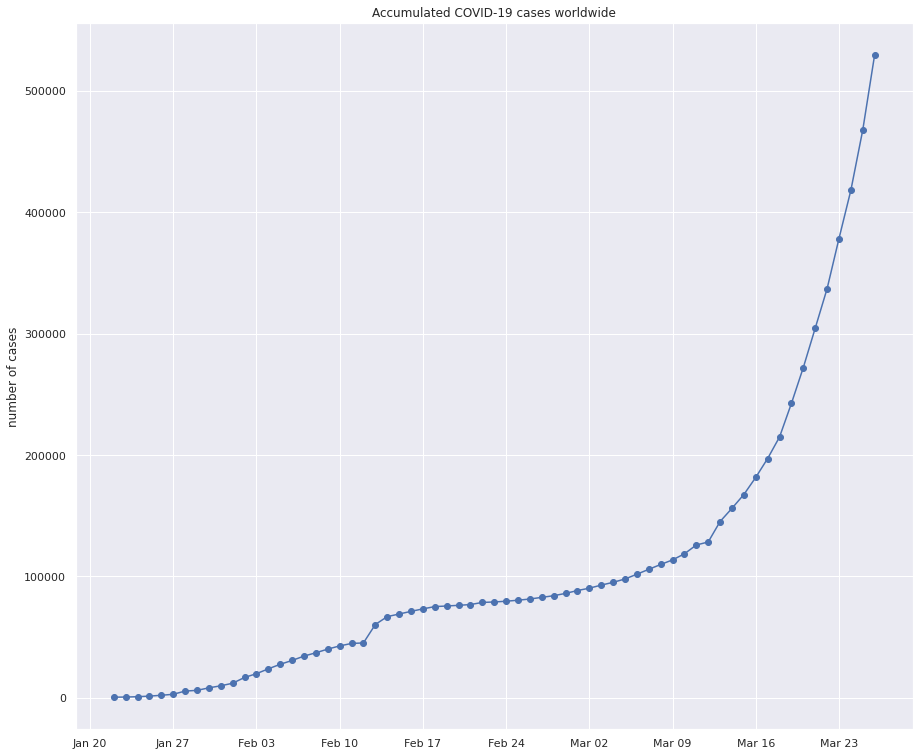

In [255]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.dates as mdates

#df_confirmed_world.plot(marker='o', linestyle='-',figsize=(10,8))

fig, ax = plt.subplots(figsize=(15,13))
ax.plot(df_confirmed_world, marker='o', linestyle='-')
ax.set_ylabel('number of cases')
ax.set_title('Accumulated COVID-19 cases worldwide')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Comments

**"Justify the exponential rate of increase"**

A virus spreads exponentially, simply because each infected person will infect other people which have the same chance of infecting new people. (Though this chance will slowly decrease due to immunization)
So if we say that a person with COVID-19 infects $r$ people on average and we model this spread then:

$t$ = days, 
$C$ = number of infected people,
$I$ = initially infected people,
$r$ = rate of infection

$C_{t+1} = I + $r$^{C_t}$

**"Provide commentary on the problems that arise from the selection bias introduced by different ways that countries handle reporting. If you find fit, do some research into how countries do tests and how do they report their cases"**

 
South Korea (along with Singapore, Taiwan, Vietnam) introduced one of the largest and best-organised programs in the world.Extensive measures have been taken to screen the population for the virus, and isolate any infected people as well as trace and quarantine those who contacted them.
SK tested over 348,582 as of 24 March 2020 and reports a case fatality rate of 1.33%, which is lower than WHO's global case fatality rate of 3.43%.

In comparison the Netherlands there were only 38000 tests performed to this day and certain groups were prioritised in testing, such as healthcare workers, elderly, and people with acute symptoms. Their death rate of confirmed COVID-19 cases is around 6.5%.

This shows that not all countries are an equally good source of data to understand the rate of spread or the death rate of COVID-19. If you test only people with high risk, then this information is not representative for the whole population. Also you will not get a good understanding of the spread of the virus in your country if you do not perform a more broad testing, because the asymptomatic or less critical cases will not be captured.

**"Provide commentary (and eventually a solution) of the "start day problem" of the timeseries: The problem is that while in China the outbreak was already in January, in Italy it was in late February and in the Netherlands is not quite yet determined(?). Define your "day 0" properly: If you look online, some people consider as day 0, either the day that the country reported the first infection, or the day that a cummulative amount of e.g. 50 infections were reported, or you might think of something else. The reason for this is to have a proper comparison metric for the timeseries of different countries."**

I take the day at which the first person was infected as "day 0". In all these cases the virus was already spread further and the shadow number already higher than 1. Thus you can say that it was the day that the pandemic hit a country. 

**"Pick some countries (incl. Netherlands) and visualize the results on this "shifted"/"normalized" time-scale"**

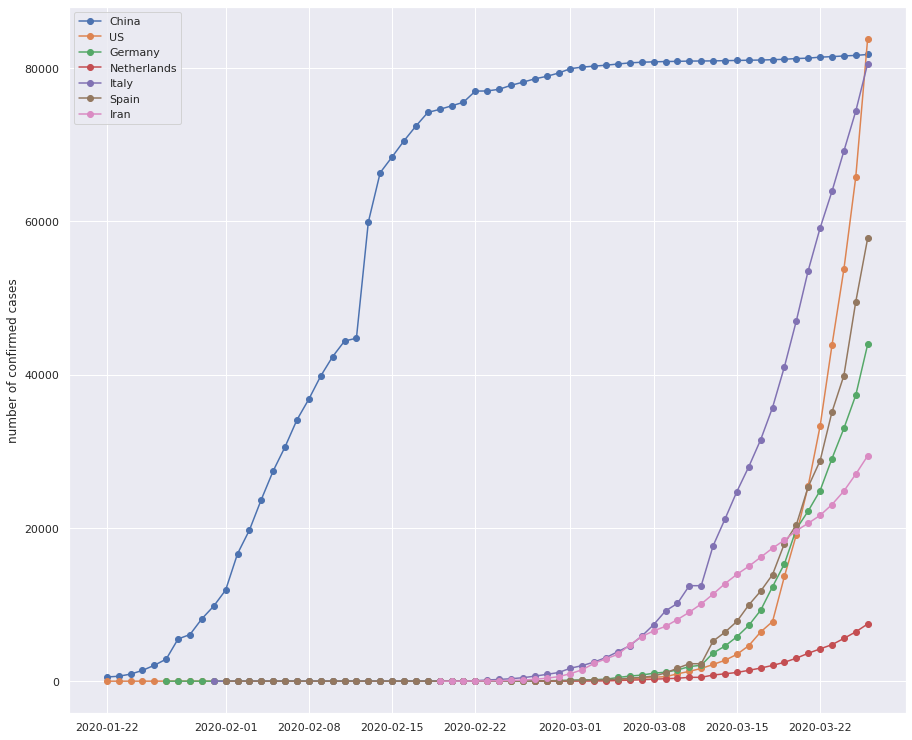

In [256]:
#
th = 1
countries = ["China", "US", "Germany", "Netherlands", "Italy","Spain", "Iran"]
fig, ax = plt.subplots(figsize=(15,13))
ax.set_ylabel('number of confirmed cases');

for country in countries:
    cases = [df_confirmed[date][df_confirmed["Country/Region"] == country].sum() for date in df_confirmed.iloc[:,4:] if df_confirmed[date][df_confirmed["Country/Region"] == country].sum() >= th ]
    df_confirmed_country = pd.DataFrame({"number of confirmed cases" : 
                                       cases},
                                     index = pd.to_datetime(df_confirmed.columns[len(df_confirmed.columns)-len(cases):]))
    ax.plot(df_confirmed_country, marker='o', linestyle='-',label=country)
ax.legend(countries)


**Report preliminary results on the visual inspection of the plots**

The curves are shaped very different. It is hard to get meaningful results just by looking at the numbers because of the selection bias. But assuming we trust the data, then we can see that in case of China the rate of new infected cases went down and their measures were successfull. Other european countries have not reached the inflection point yet.

## **ARIMA Model**

I am fitting an ARIMA model based on the data from the 25.3. Note that the model has to be updated if more recent data is used. 

In [257]:
#Test the series for stationarity (it's clearly not)

#then augmented dickey fuller test adfuller()
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_confirmed_world["total number of confirmed cases"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])



ADF Statistic: 1.694520
p-value: 0.998115


Text(0.5, 1.0, '3rd Order Differencing')

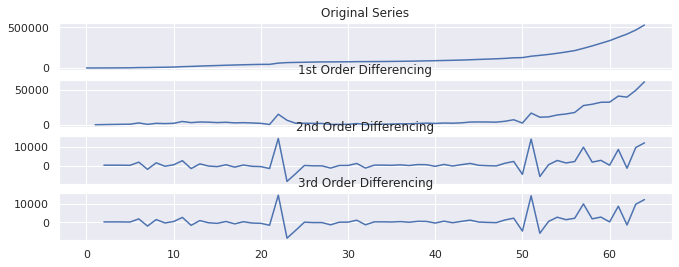

In [281]:
#plot the series after differencing it

fig, axes = plt.subplots(4, 1, sharex=True)
axes[0].plot(df_confirmed_world.reset_index()["total number of confirmed cases"])
axes[0].set_title('Original Series')
axes[1].plot(df_confirmed_world.reset_index()["total number of confirmed cases"].diff())
axes[1].set_title('1st Order Differencing')
axes[2].plot(df_confirmed_world.reset_index()["total number of confirmed cases"].diff().diff())
axes[2].set_title('2nd Order Differencing')
axes[3].plot(df_confirmed_world.reset_index()["total number of confirmed cases"].diff().diff())
axes[3].set_title('3rd Order Differencing')

It looks like it reaches stationarity at the second differencing, but we have a look at the autocorrelation to make sure and make another test to make sure.

In [293]:
result = adfuller(df_confirmed_world.reset_index()["total number of confirmed cases"].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.376213
p-value: 0.998999


Woops it is not stationary yet. I think the tail has something to do with it.

In [294]:
result = adfuller(df_confirmed_world.reset_index()["total number of confirmed cases"].diff().diff().dropna()[:-1])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.728372
p-value: 0.000000


The spike in the end actually is a reason. It seems like the confirmed cases really accelerated given the last day.
If the ACF-PACF plots look fine, I will leave it with the second difference anyway.

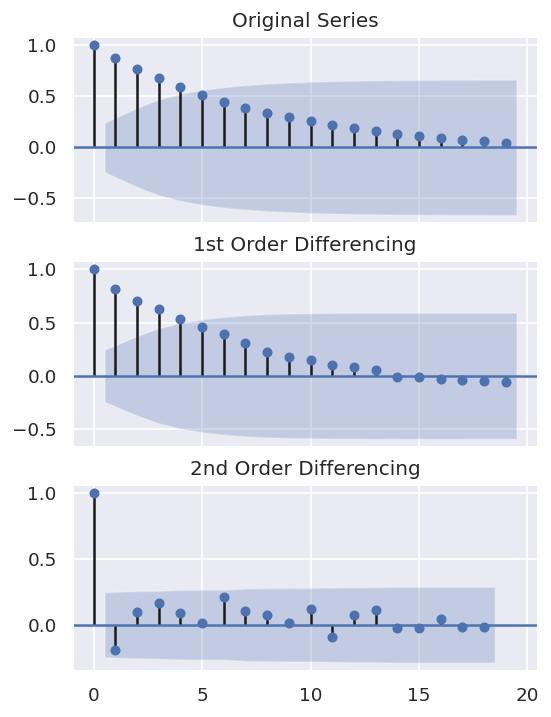

In [295]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(5,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 1, sharex=True)
plot_acf(df_confirmed_world.reset_index()["total number of confirmed cases"], ax=axes[0])
axes[0].set_title('Original Series')

# 1st Differencing
plot_acf(df_confirmed_world.reset_index()["total number of confirmed cases"].diff().dropna(), ax=axes[1])
axes[1].set_title('1st Order Differencing')
                     
                     
# 2nd Differencing
plot_acf(df_confirmed_world.reset_index()["total number of confirmed cases"].diff().diff().dropna(), ax=axes[2])
axes[2].set_title('2nd Order Differencing')

plt.show()

The graph reaches stationarity at the second difference, but it seems slightly overdifferenced.

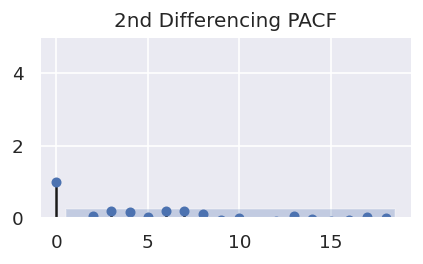

In [296]:
# PACF plot of 2st differenced series
plt.rcParams.update({'figure.figsize':(4,2), 'figure.dpi':120})

fig, ax = plt.subplots(1, 1, sharex=True)
ax.set(ylim=(0,5))
plot_pacf(df_confirmed_world.reset_index()["total number of confirmed cases"].diff().diff().dropna(), ax=ax)
ax.set_title('2nd Differencing PACF')
plt.show()

Given that there is no sharp cut-off in the PACF and the ACF lag-1 term is negative (overdifferenced) I will add an MA term. The ACF cuts off after one lag, so I take an MA(1).

In [297]:
from statsmodels.tsa.arima_model import ARIMA

# 0,2,1 ARIMA Model 
model = ARIMA(df_confirmed_world["total number of confirmed cases"].dropna(), order=(0,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                     ARIMA Model Results                                      
Dep. Variable:     D2.total number of confirmed cases   No. Observations:                   63
Model:                                 ARIMA(0, 2, 1)   Log Likelihood                -610.783
Method:                                       css-mle   S.D. of innovations           3927.618
Date:                                Sat, 28 Mar 2020   AIC                           1227.567
Time:                                        11:14:23   BIC                           1233.996
Sample:                                    01-24-2020   HQIC                          1230.096
                                         - 03-26-2020                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                 

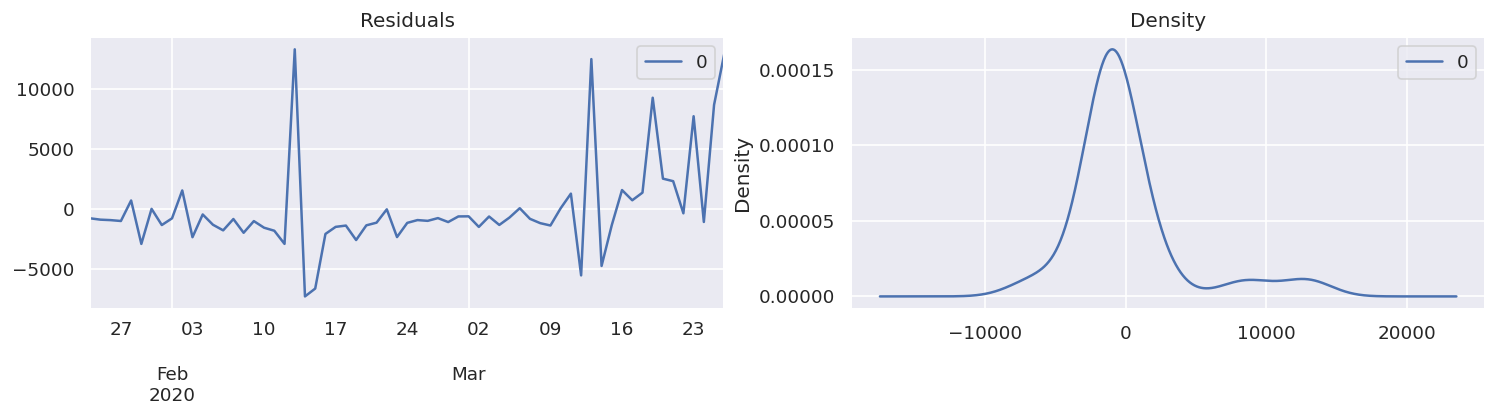

In [298]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':120})

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

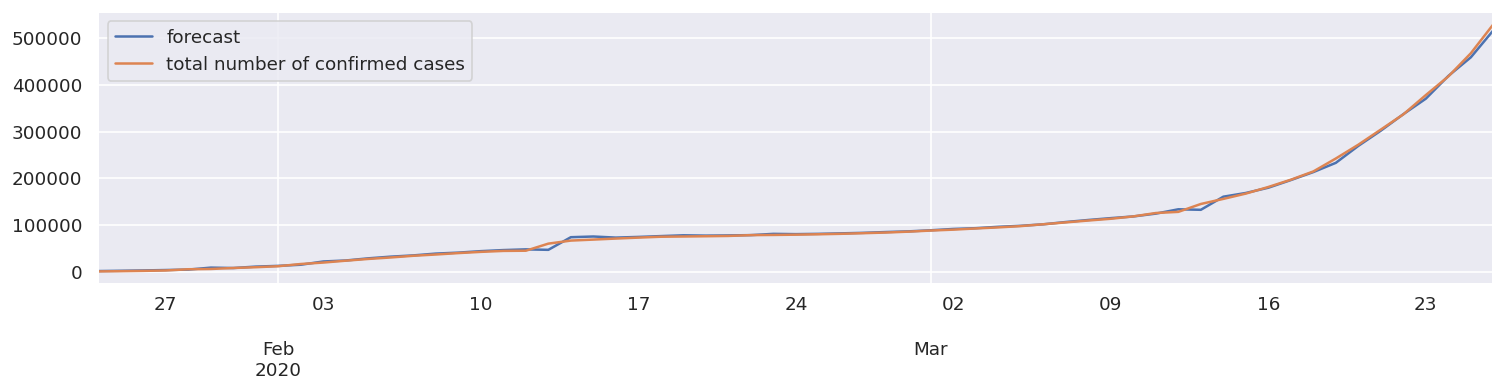

In [299]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

Our model fits the timeseries fine. The p values for the coefficients are less than 0.05. The residuals are close to mean 0 and the fitted forecast looks good.

In [300]:
#Out of time cross-validation
from statsmodels.tsa.stattools import acf

# Create Training and Test
size = df_confirmed_world.size
train = df_confirmed_world[:size-5]
test = df_confirmed_world[-5:]

In [301]:
#build model
model = ARIMA(train, order=(0, 2, 1))  
fitted = model.fit(disp=-1)  

#forecast
fc, stder, conf = fitted.forecast(test.size, alpha=0.05)  # 95% conf

forecast_series = pd.Series(fc, index=test.index)
lower_conf_series = pd.Series(conf[:, 0], index=test.index)
upper_conf_series = pd.Series(conf[:, 1], index=test.index)

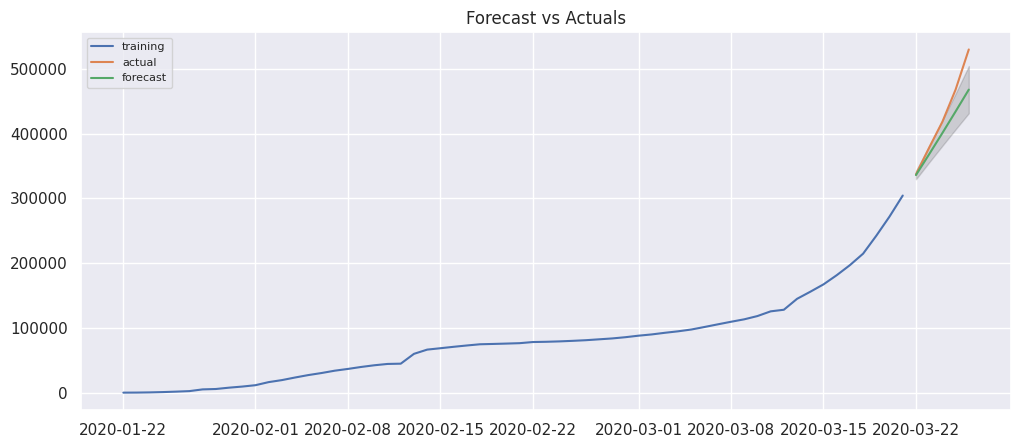

In [302]:
#plot 
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast_series, label='forecast')
plt.fill_between(lower_conf_series.index, lower_conf_series, upper_conf_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

We can see that in the real case, our model doesn't predict the curve well. I think this is the case because of policy making worlwide that cause sudden changes in the rate of infection and how people are tested and reported. 
I.e **there are changes in the dynamics which make it hard to statistically model just on historic data **


In [303]:
# MSE and the MAE of our model
mae = np.mean(np.abs(fc-test.values))
mse = np.mean(np.square(fc-test.values))

print('%0.2f' % mae,'%0.2f' % mse)

69276.64 7331445720.88


Now I will use the pmdarima packackage which can compute p,d,q automatically by searching multiple combinations of p,q,d and chooses the model with the least AIC. 

In [304]:
import pmdarima as pm
model = pm.auto_arima(df_confirmed_world, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1229.135, BIC=1237.707, Time=0.137 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1227.740, BIC=1232.026, Time=0.010 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1227.107, BIC=1233.536, Time=0.020 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1228.081, BIC=1234.510, Time=0.034 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=1229.460, BIC=1231.603, Time=0.009 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1229.023, BIC=1237.596, Time=0.046 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1222.870, BIC=1233.586, Time=0.292 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1228.038, BIC=1240.897, Time=0.100 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1230.521, BIC=1243.380, Time=0.129 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1228.919, BIC=1239.

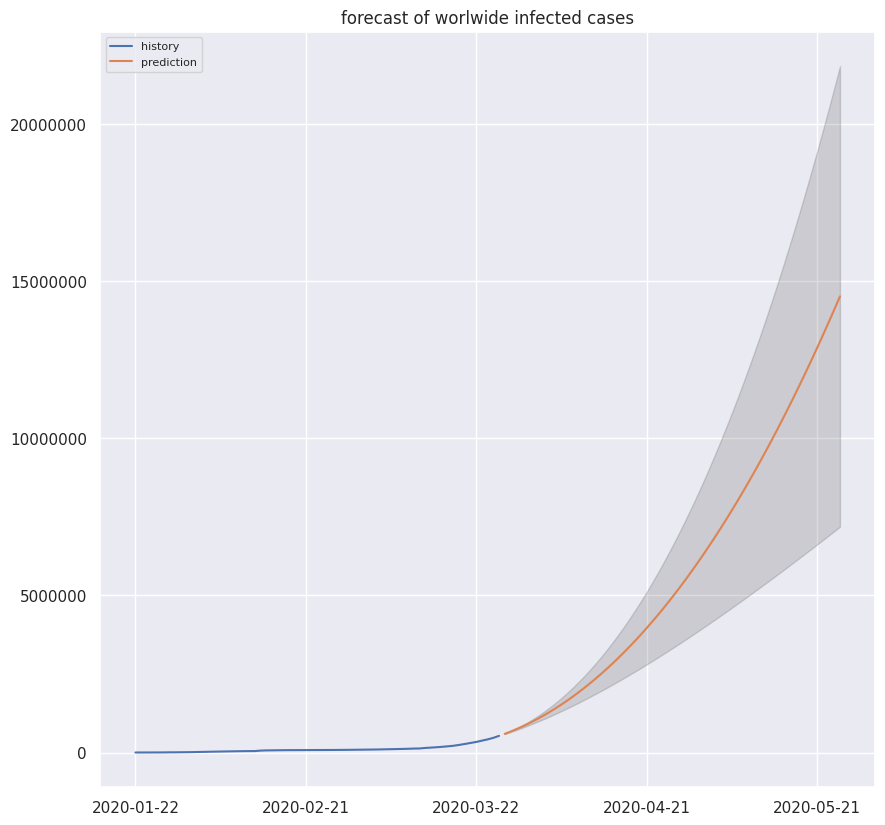

In [305]:
import datetime

#actual prediction for the next n days using the auto arima model
n = 60

future_fc,conf = model.predict(n,return_conf_int=True)
future_fc_series = pd.Series(future_fc, index= (df_confirmed_world.index + datetime.timedelta(days=n))[-n:])
lower_conf_series = pd.Series(conf[:, 0], index=(df_confirmed_world.index + datetime.timedelta(days=n))[-n:])
upper_conf_series = pd.Series(conf[:, 1], index=(df_confirmed_world.index + datetime.timedelta(days=n))[-n:])

#plot 
plt.figure(figsize=(10,10), dpi=100)
plt.plot(df_confirmed_world, label='history')
plt.plot(future_fc_series, label='prediction')
plt.fill_between(lower_conf_series.index, lower_conf_series, upper_conf_series, 
                 color='k', alpha=.15)
plt.title('forecast of worlwide infected cases')
plt.xticks(df_confirmed_world.index.append(future_fc_series.index)[0::30])
plt.ticklabel_format(style='plain',axis='y')
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Prediction for Germany**

In [306]:
cases = [df_confirmed[date][df_confirmed["Country/Region"] == "Germany"].sum() for date in df_confirmed.iloc[:,4:] if df_confirmed[date][df_confirmed["Country/Region"] == country].sum() >= 5]
df_confirmed_germany = pd.DataFrame({"number of confirmed cases" : 
                                       cases},
                                     index = pd.to_datetime(df_confirmed.columns[len(df_confirmed.columns)-len(cases):]))

In [307]:
#build model
model = pm.auto_arima(df_confirmed_germany, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())



Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=548.002, BIC=554.107, Time=0.320 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=548.341, BIC=551.394, Time=0.134 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=546.679, BIC=551.259, Time=0.018 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=546.164, BIC=550.743, Time=0.104 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=548.706, BIC=550.232, Time=0.012 seconds
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=547.724, BIC=553.830, Time=0.255 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=549.041, BIC=556.673, Time=0.549 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 1.422 seconds
                               SARIMAX Results                                
Dep. Variable:   

In [308]:
#forecast for n days
n = 30
future_fc,  conf = model.predict(n,return_conf_int=True)
future_fc_series = pd.Series(future_fc, index= (df_confirmed_germany.index + datetime.timedelta(days=n))[-n:])
lower_conf_series = pd.Series(conf[:, 0], index=(df_confirmed_germany.index + datetime.timedelta(days=n))[-n:])
upper_conf_series = pd.Series(conf[:, 1], index=(df_confirmed_germany.index + datetime.timedelta(days=n))[-n:])

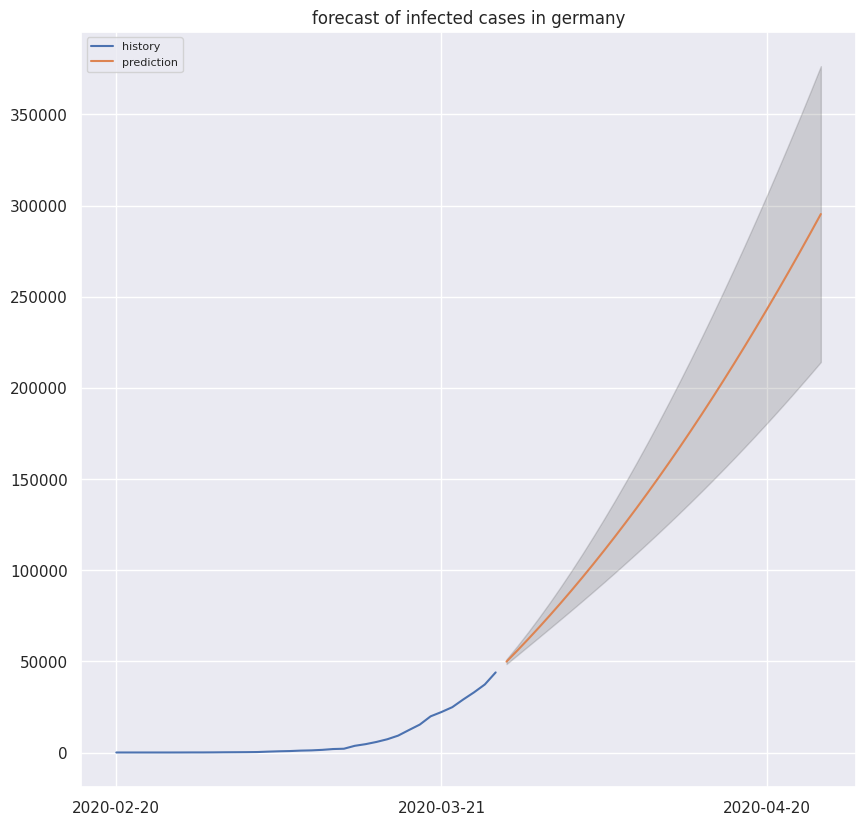

In [309]:
#plot 
plt.figure(figsize=(10,10), dpi=100)
plt.plot(df_confirmed_germany, label='history')
plt.plot(future_fc_series, label='prediction')
plt.fill_between(lower_conf_series.index, lower_conf_series, upper_conf_series, 
                 color='k', alpha=.15)
plt.title('forecast of infected cases in germany')
plt.xticks(df_confirmed_germany.index.append(future_fc_series.index)[0::30])
plt.ticklabel_format(style='plain',axis='y')
plt.legend(loc='upper left', fontsize=8)
plt.show()